# 🔍 Logistic Regression Classification with Wine Recognition Dataset
This notebook demonstrates a complete machine learning workflow for wine classification using Logistic Regression, applied to the classic Wine Recognition dataset. The project includes data loading, preprocessing, exploratory data analysis (EDA), model training, and comprehensive evaluation with visualizations.

In [12]:
# Cell 1: Import libraries and set global configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Jupyter visualization settings
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

In [13]:
# Cell 2: Load and explore the Wine Recognition dataset
wine = load_wine()
X, y = wine.data, wine.target

# Create a DataFrame for easier data manipulation
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature names: {wine.feature_names[:3]}...")  # Show first 3 features
print(f"Class distribution:\n{pd.Series(y).value_counts().sort_index()}")

Dataset shape: (178, 14)
Number of classes: 3
Feature names: ['alcohol', 'malic_acid', 'ash']...
Class distribution:
0    59
1    71
2    48
Name: count, dtype: int64


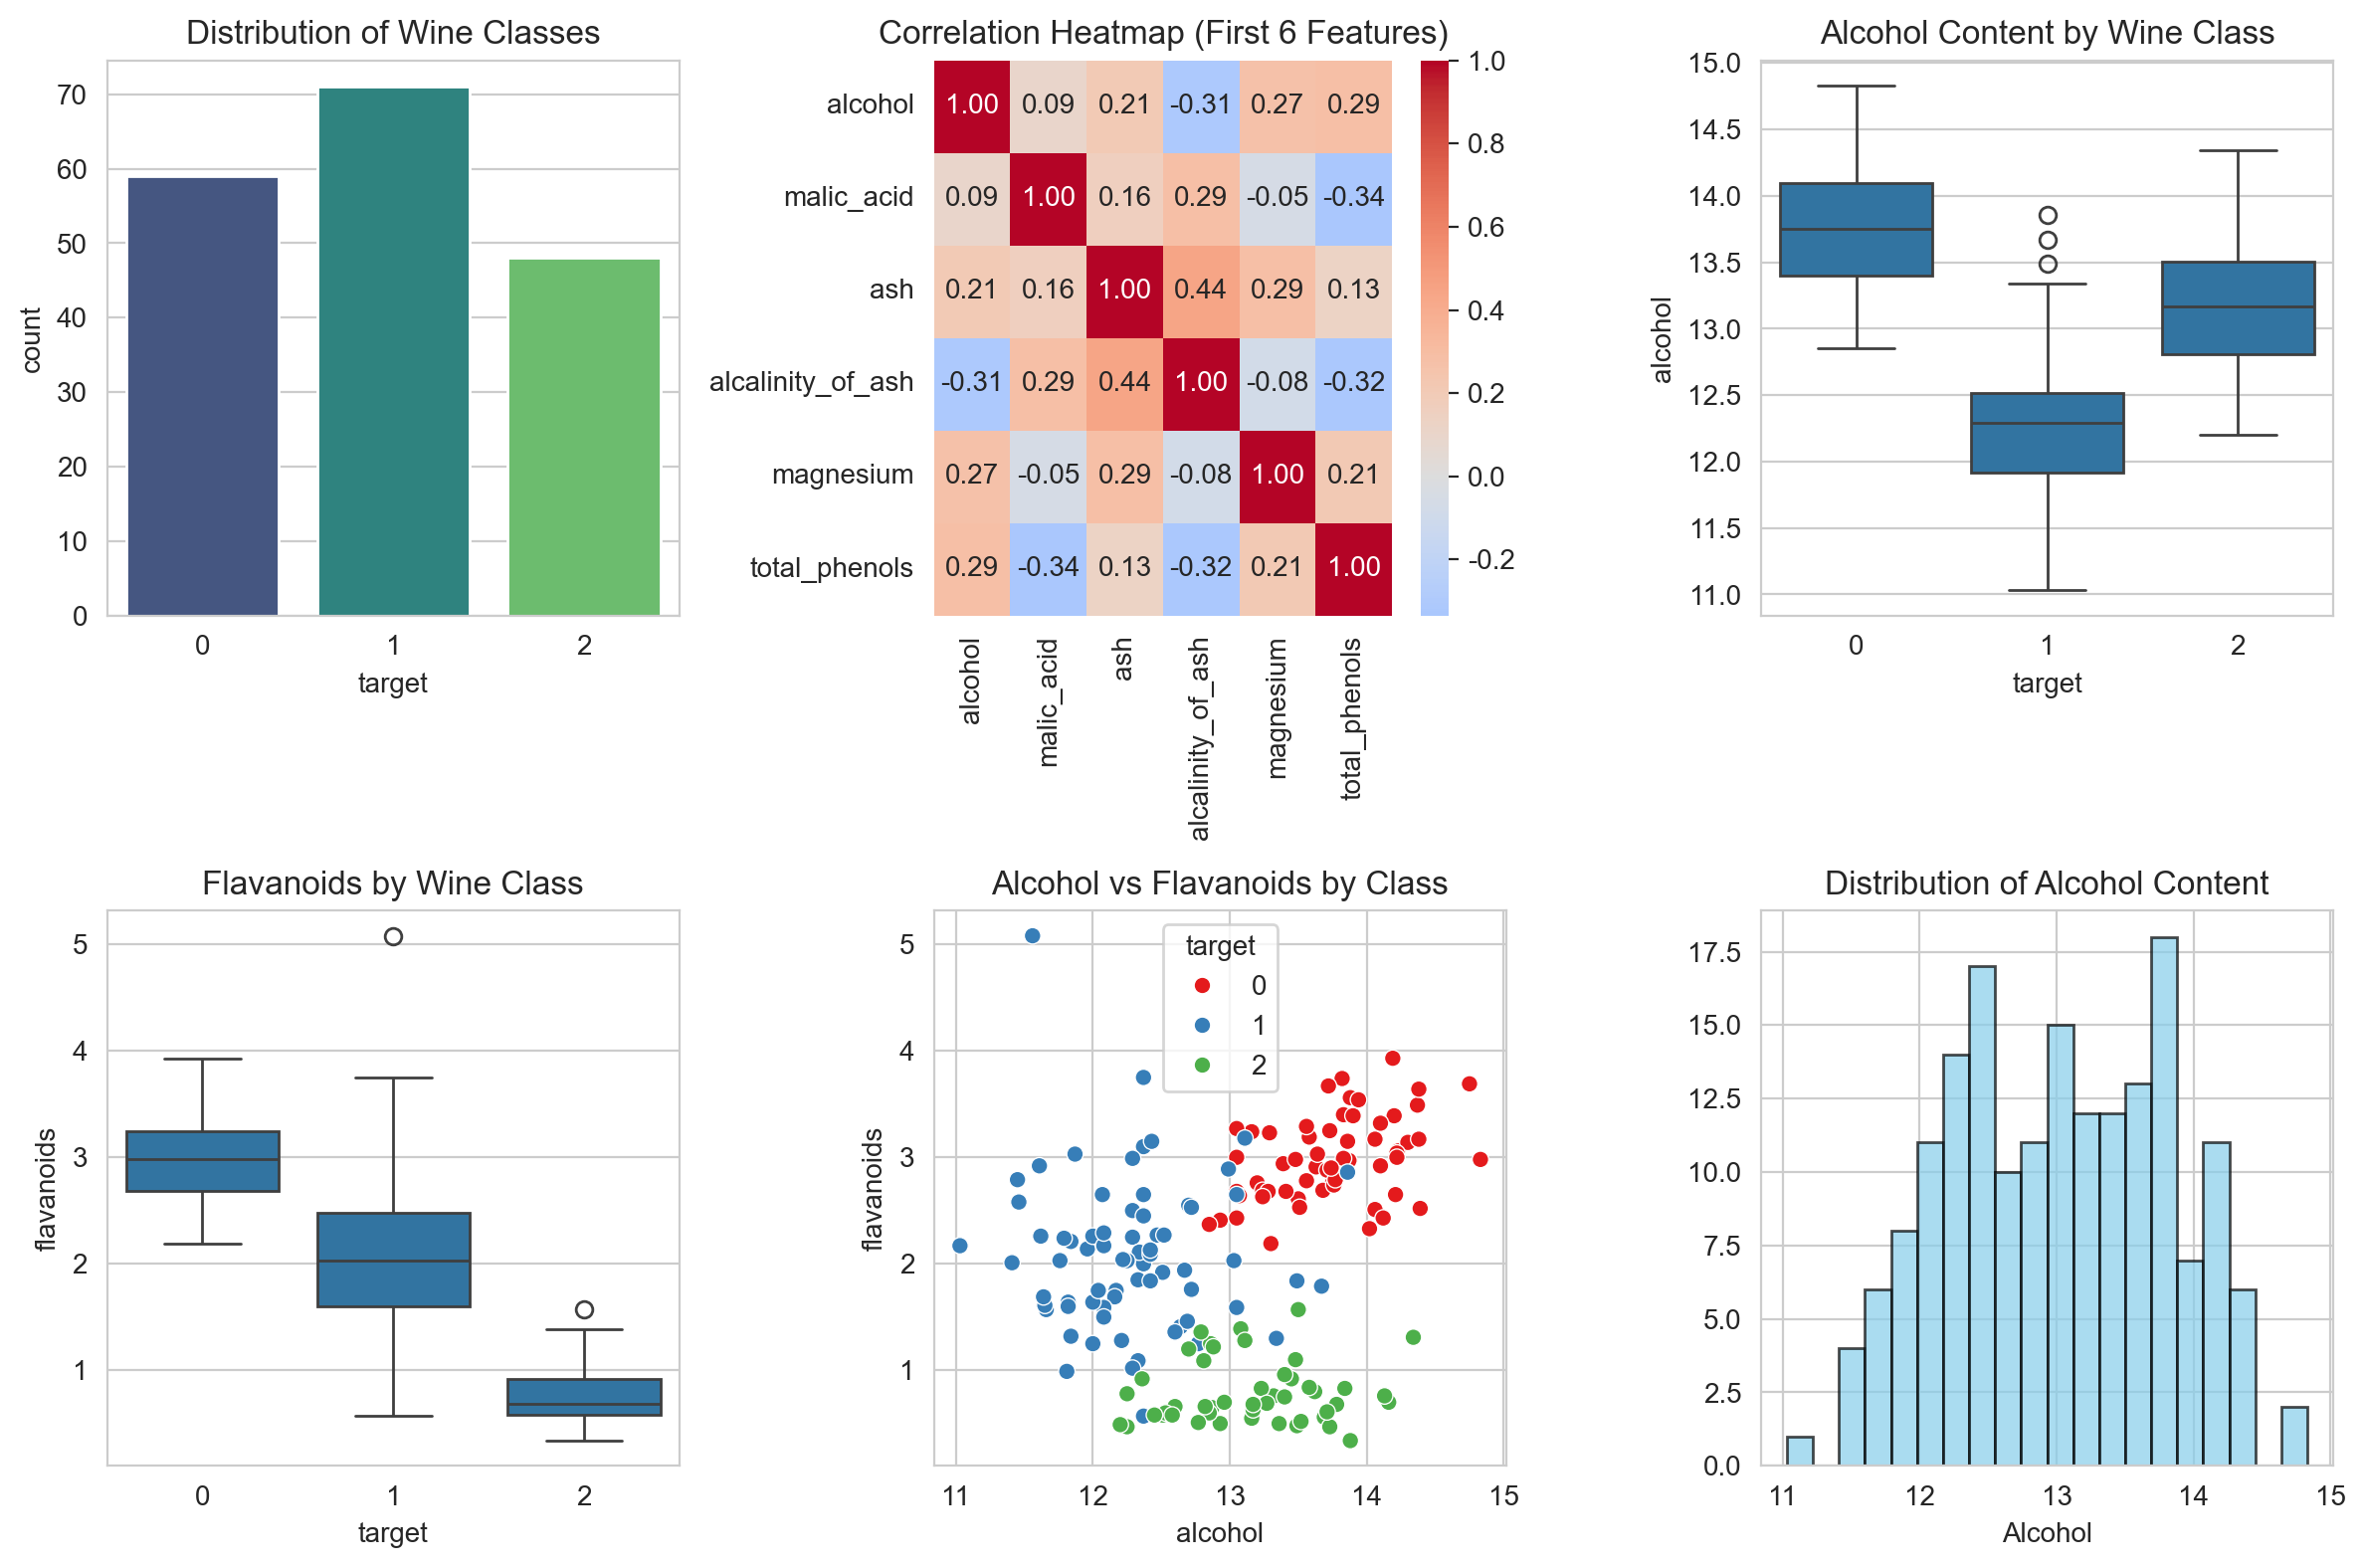

In [14]:
# Cell 3: Exploratory Data Analysis
plt.figure(figsize=(12, 8))

# Distribution of classes
plt.subplot(2, 3, 1)
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Wine Classes')

# Correlation heatmap for selected features
plt.subplot(2, 3, 2)
selected_features = df.iloc[:, :6]  # First 6 features for readability
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap (First 6 Features)')

# Distribution of alcohol content by class
plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Class')

# Distribution of flavanoids by class
plt.subplot(2, 3, 4)
sns.boxplot(x='target', y='flavanoids', data=df)
plt.title('Flavanoids by Wine Class')

# Pairplot for key features
plt.subplot(2, 3, 5)
sns.scatterplot(x='alcohol', y='flavanoids', hue='target', data=df, palette='Set1')
plt.title('Alcohol vs Flavanoids by Class')

# Feature distribution histogram
plt.subplot(2, 3, 6)
df['alcohol'].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')

plt.tight_layout()
plt.show()

In [15]:
# Cell 4: Data preprocessing and train-test split
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Training class distribution:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"Test class distribution:\n{pd.Series(y_test).value_counts().sort_index()}")

Training set shape: (142, 13)
Test set shape: (36, 13)
Training class distribution:
target
0    47
1    57
2    38
Name: count, dtype: int64
Test class distribution:
target
0    12
1    14
2    10
Name: count, dtype: int64


In [16]:
# Cell 5: Logistic Regression model training and evaluation
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Model Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



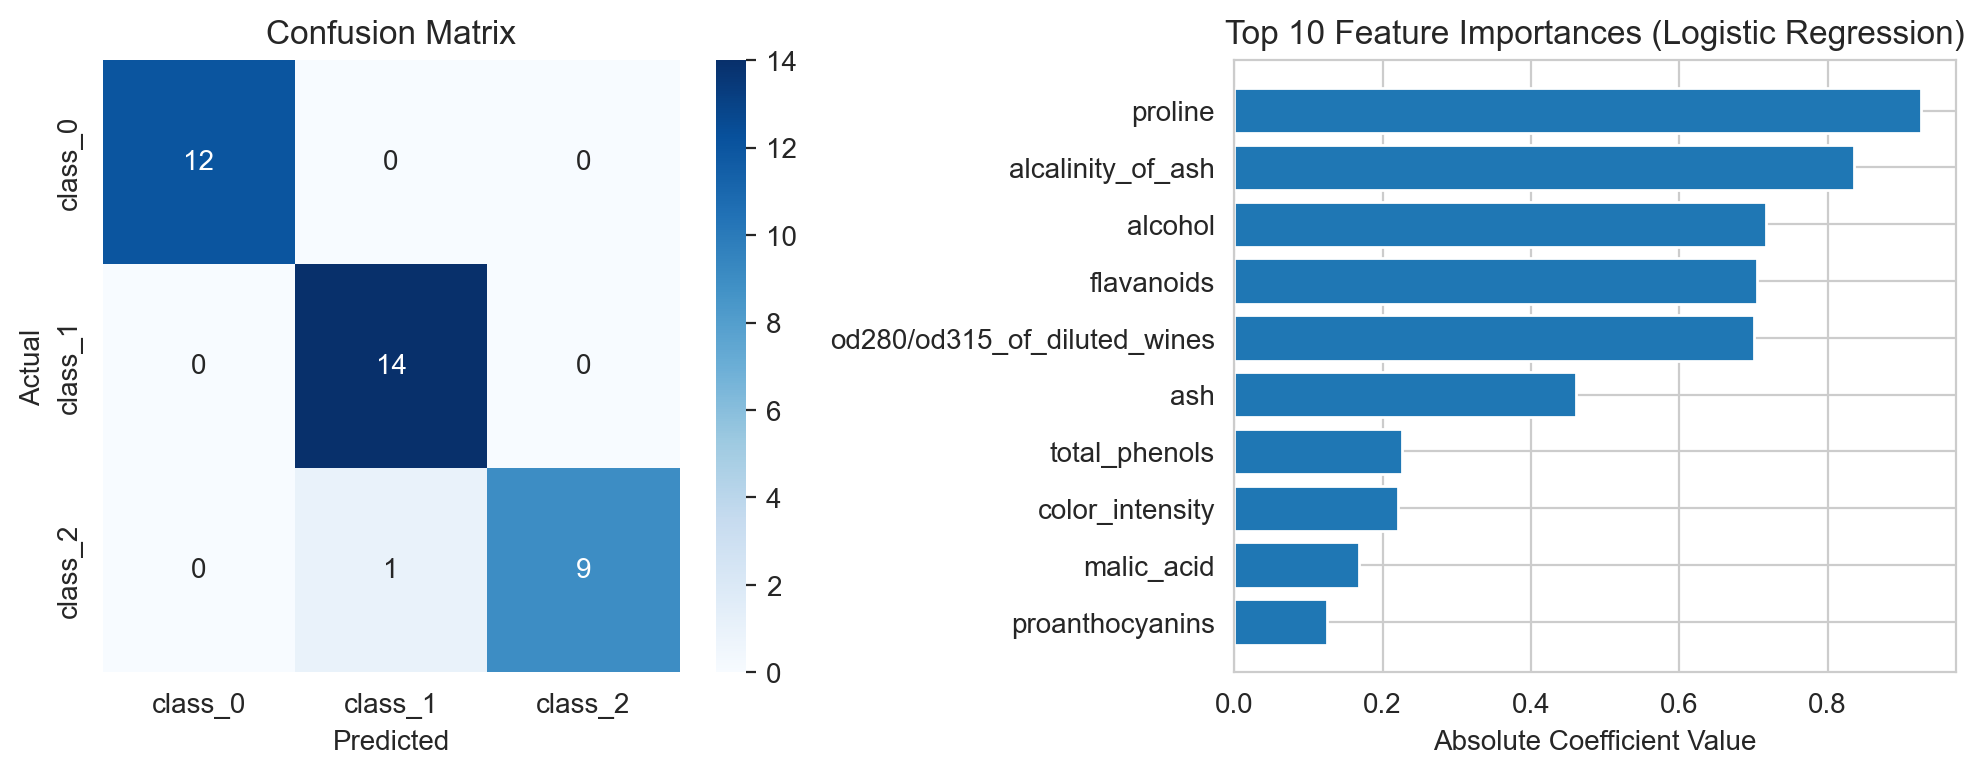

In [17]:
# Cell 6: Visualization of results
plt.figure(figsize=(10, 4))

# Confusion matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance (coefficients for one of the classes)
plt.subplot(1, 2, 2)
feature_importance = np.abs(log_reg.coef_[0])  # Taking coefficients for class 0 as example
top_features_idx = np.argsort(feature_importance)[-10:]  # Top 10 important features
top_features = [wine.feature_names[i] for i in top_features_idx]

plt.barh(range(len(top_features)), feature_importance[top_features_idx])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.tight_layout()

plt.show()

In [18]:
# Cell 7: Model interpretation and discussion
# Display model parameters
print("Model Parameters:")
print(f"Intercept: {log_reg.intercept_}")
print(f"Number of iterations: {log_reg.n_iter_}")

# Show prediction probabilities for a few test samples
probabilities = log_reg.predict_proba(X_test_scaled[:5])
print("\nPrediction probabilities for first 5 test samples:")
for i, prob in enumerate(probabilities):
    print(f"Sample {i+1}: {prob} -> Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

print(f"\nOverall model performance is strong with {accuracy:.1%} accuracy on the test set.")
print("The model successfully distinguishes between the three different wine cultivars based on chemical analysis.")

Model Parameters:
Intercept: [ 0.31259025  0.88550658 -1.19809683]
Number of iterations: [17]

Prediction probabilities for first 5 test samples:
Sample 1: [9.99670802e-01 3.06618686e-04 2.25789222e-05] -> Predicted: 0, Actual: 0
Sample 2: [0.00705147 0.54042299 0.45252555] -> Predicted: 1, Actual: 2
Sample 3: [9.92000329e-01 7.66358777e-03 3.36083043e-04] -> Predicted: 0, Actual: 0
Sample 4: [0.28996738 0.70746736 0.00256526] -> Predicted: 1, Actual: 1
Sample 5: [0.033032   0.96231279 0.00465521] -> Predicted: 1, Actual: 1

Overall model performance is strong with 97.2% accuracy on the test set.
The model successfully distinguishes between the three different wine cultivars based on chemical analysis.
